# K Means Clustring Algorithm



@Auther: Renu Jaiswal

## Import Libraries

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

## Read the data

In [3]:
customer_df = pd.read_csv("./data/Mall_Customers.csv")
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Exploration

In [4]:
# Check for null values
customer_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Observation: There is no missing values inthe columns

Text(0, 0.5, 'Spending Score (1-100)')

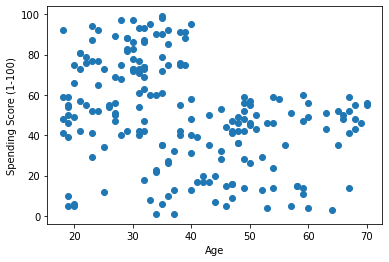

In [14]:
plt.scatter(customer_df["Age"], customer_df["Spending Score (1-100)"])  # Creating a scatter plot with Age on the x-axis and Spending Score on the y-axis

plt.xlabel("Age")  # Setting the label for the x-axis as "Age"
plt.ylabel("Spending Score (1-100)")  # Setting the label for the y-axis as "Spending Score (1-100)"


Text(0, 0.5, 'Annual Income (k$)')

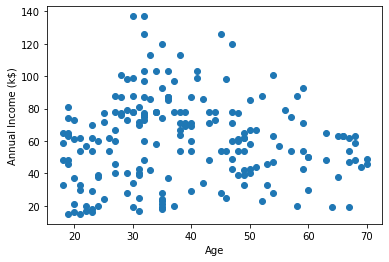

In [7]:
plt.scatter(customer_df["Age"], 
            customer_df["Annual Income (k$)"])

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

Text(0, 0.5, 'Annual Income (k$)')

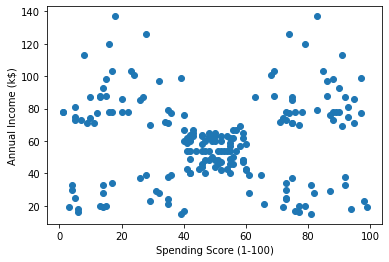

In [8]:
plt.scatter(customer_df["Spending Score (1-100)"], 
            customer_df["Annual Income (k$)"])

plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")

## Choose relevant columns

In [10]:
relevant_cols = ["Age", "Annual Income (k$)", 
                 "Spending Score (1-100)"]

customer_df = customer_df[relevant_cols]

In [11]:
customer_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Data Transformation

In [13]:
from sklearn.preprocessing import StandardScaler  # Importing the StandardScaler class from sklearn.preprocessing module

scaler = StandardScaler()  # Creating an instance of the StandardScaler class

scaler.fit(customer_df)  # Fitting the scaler to the customer_df dataset to compute mean and standard deviation

scaled_data = scaler.transform(customer_df)  # Transforming the customer_df dataset using the computed scaling parameters


## Determine he best number of cluster

In [16]:
def find_best_clusters(df, maximum_K):
    
    clusters_centers = []  # List to store the cluster inertia values
    k_values = []  # List to store the values of k (number of clusters)
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)  # Creating a KMeans model with the current k value
        kmeans_model.fit(df)  # Fitting the model to the data
        
        clusters_centers.append(kmeans_model.inertia_)  # Appending the cluster inertia to the list
        k_values.append(k)  # Appending the current k value to the list
        
    return clusters_centers, k_values


def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))  # Creating a figure with a specific size
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')  # Plotting the k values against the cluster inertia values
    plt.xlabel("Number of Clusters (K)")  # Setting the label for the x-axis
    plt.ylabel("Cluster Inertia")  # Setting the label for the y-axis
    plt.title("Elbow Plot of KMeans")  # Setting the title for the plot
    plt.show()  # Displaying the plot


In [17]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

C:\Users\pawan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


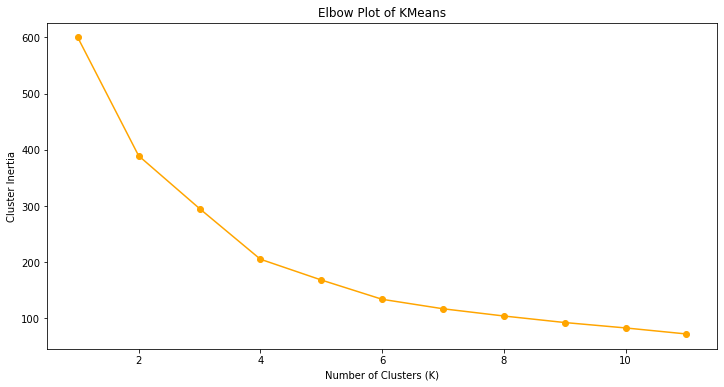

In [18]:
generate_elbow_plot(clusters_centers, k_values)

## Create the final KMeans model

In [24]:
kmeans_model = KMeans(n_clusters = 5)

kmeans_model.fit(scaled_data)

KMeans(n_clusters=5)

In [20]:
customer_df["clusters"] = kmeans_model.labels_

In [21]:
customer_df.head()

,Age,Annual Income (k$),Spending Score (1-100),clusters
0,19,15,39,2
1,21,15,81,2
2,20,16,6,4
3,23,16,77,2
4,31,17,40,2


## Visualization of Clusters

Text(0, 0.5, 'Annual Income')

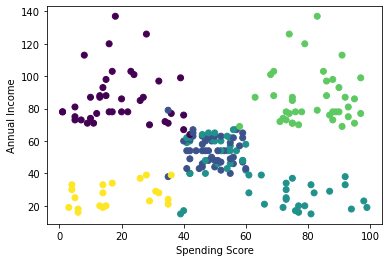

In [23]:
plt.scatter(customer_df["Spending Score (1-100)"], 
            customer_df["Annual Income (k$)"], 
            c = customer_df["clusters"])
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")